## Wine Quality dataset



In [3]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

## Extract Data

In [4]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [5]:

df_wine_quality_features = pd.DataFrame(wine_quality['data']['features'])
df_wine_quality_targets = pd.DataFrame(wine_quality['data']['targets'])
df_wine_quality = pd.concat([df_wine_quality_features, df_wine_quality_targets], axis=1, join='inner')
df_wine_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Clean Data

In [6]:
df_wine_quality.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df_wine_quality.isna().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Checking if we have outliers in our data?

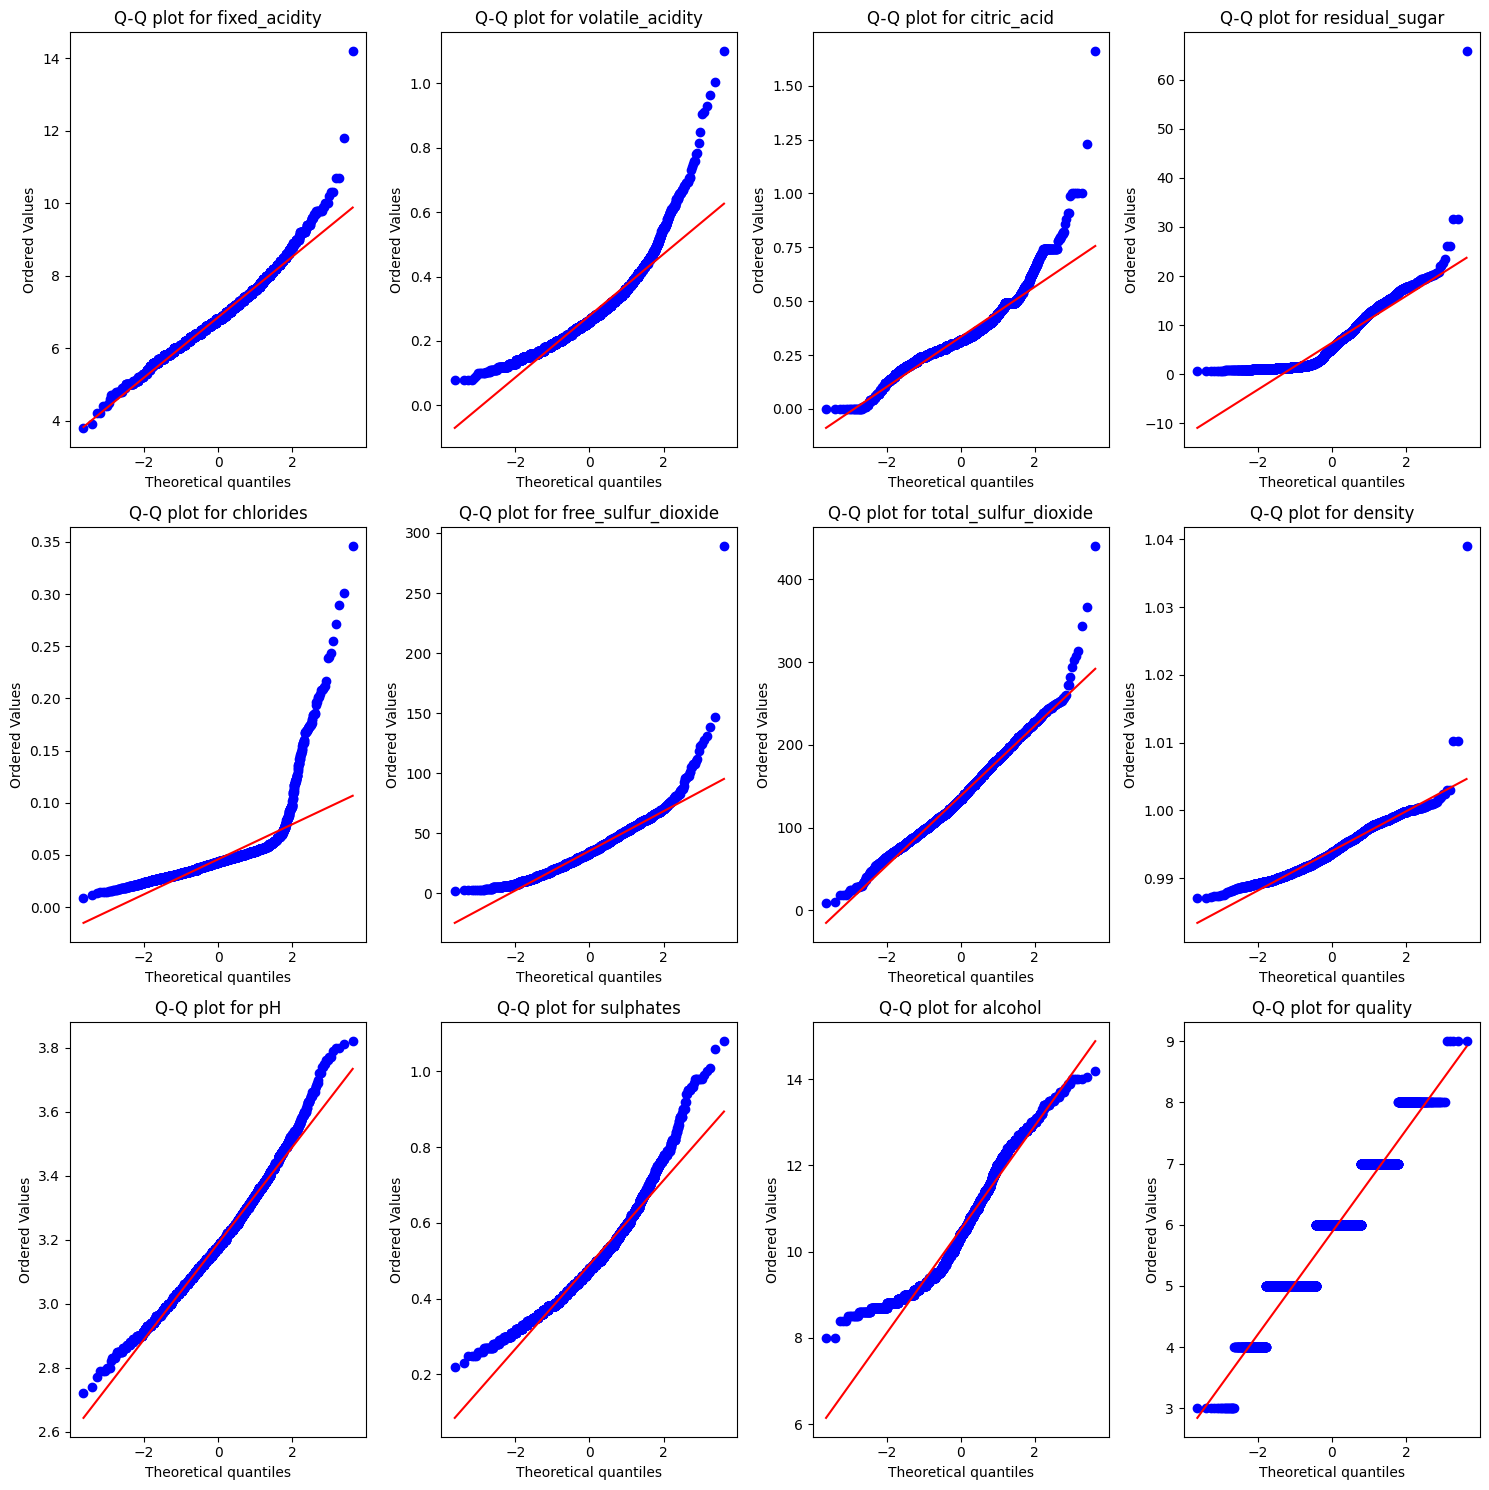

In [8]:
## Q-Q 
# boxplot - log scale 


# Create a DataFrame 'df' with more than 9 numerical columns for the example

# Select only the numerical columns from the DataFrame
numerical_columns = df_wine_quality.select_dtypes(include=[np.number]).columns

# Set up the matplotlib figure and axes for a 3x3 grid
fig, axs = plt.subplots(3, 4, figsize=(15, 15))  # Adjust the size as needed

# Flatten the array of axes to make it easier to iterate over
axs = axs.flatten()

# Loop over the numerical columns and create a Q-Q plot for each
for i, column in enumerate(numerical_columns[:12]):  # Limit to the first 9 columns
    data = df_wine_quality[column]
    stats.probplot(data, dist="norm", plot=axs[i])
    axs[i].set_title(f'Q-Q plot for {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


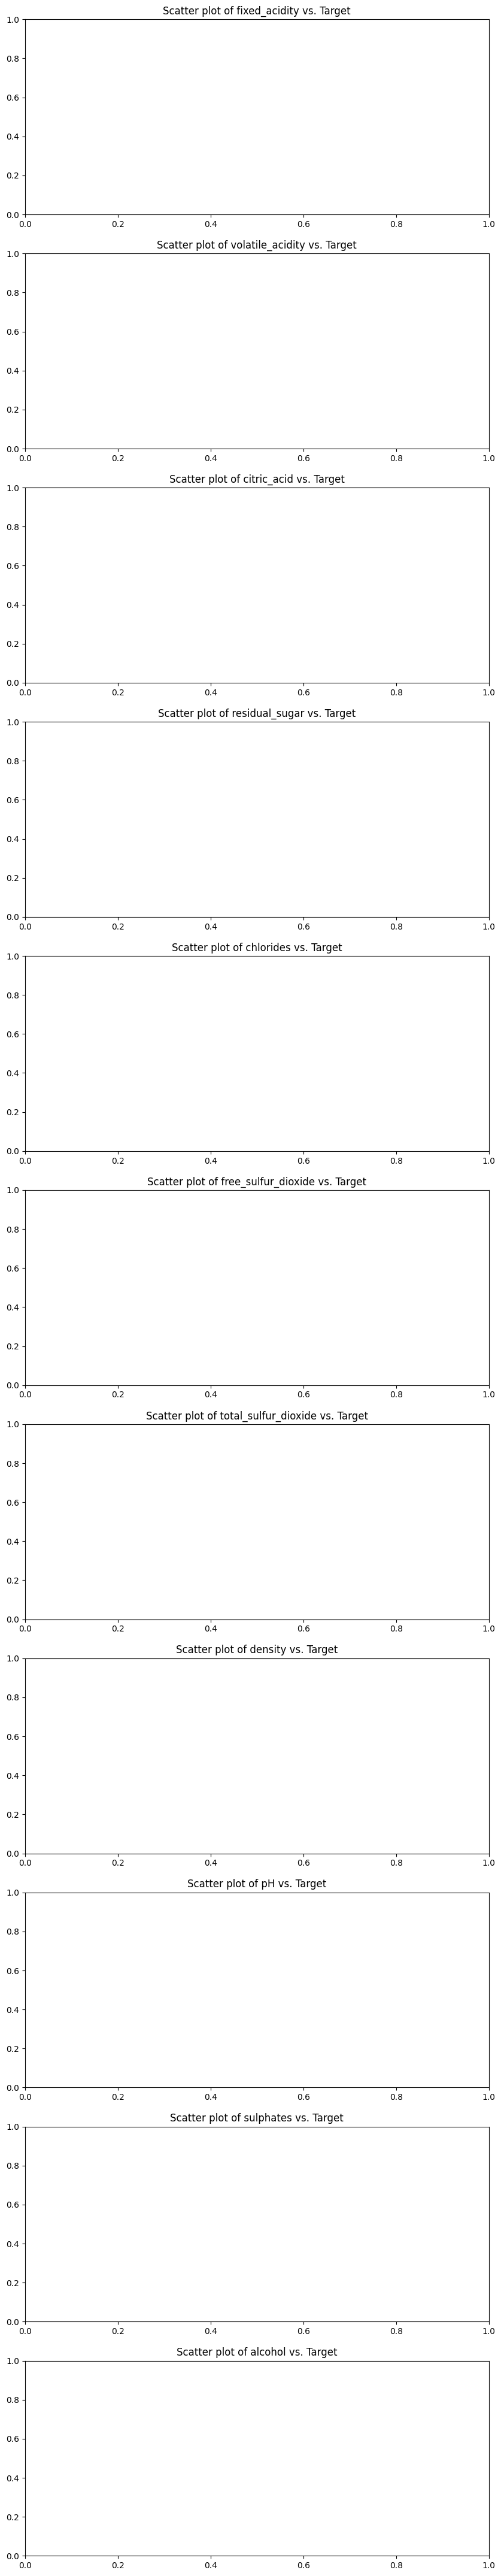

In [9]:
#scatterplots
import seaborn as sns
# Assuming 'df' is your DataFrame and 'target' is the name of your target column

# Select only the numerical feature columns, excluding the target
feature_columns = df_wine_quality_features.columns

# Set up the matplotlib figure
fig, axs = plt.subplots(len(feature_columns), figsize=(10, 5*len(feature_columns)))

# Create a scatter plot for each feature column against the target
for i, col in enumerate(feature_columns):
    #df_wine_quality.plot(kind='scatter', y=col, x='quality', ax=axs[i])
    #sns.swarmplot(data = df_wine_quality, x = 'quality', y= col, ax=axs[i] )
    axs[i].set_title(f'Scatter plot of {col} vs. Target')

# Adjust the layout and show the plot
#plt.tight_layout()
plt.show()

In [10]:
sns.swarmplot(data = df_wine_quality, x = 'quality', y= 'density')

c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

<AxesSubplot:xlabel='quality', ylabel='density'>

c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

Error in callback <function flush_figures at 0x00000263EFD6D948> (for post_execute):


KeyboardInterrupt: 

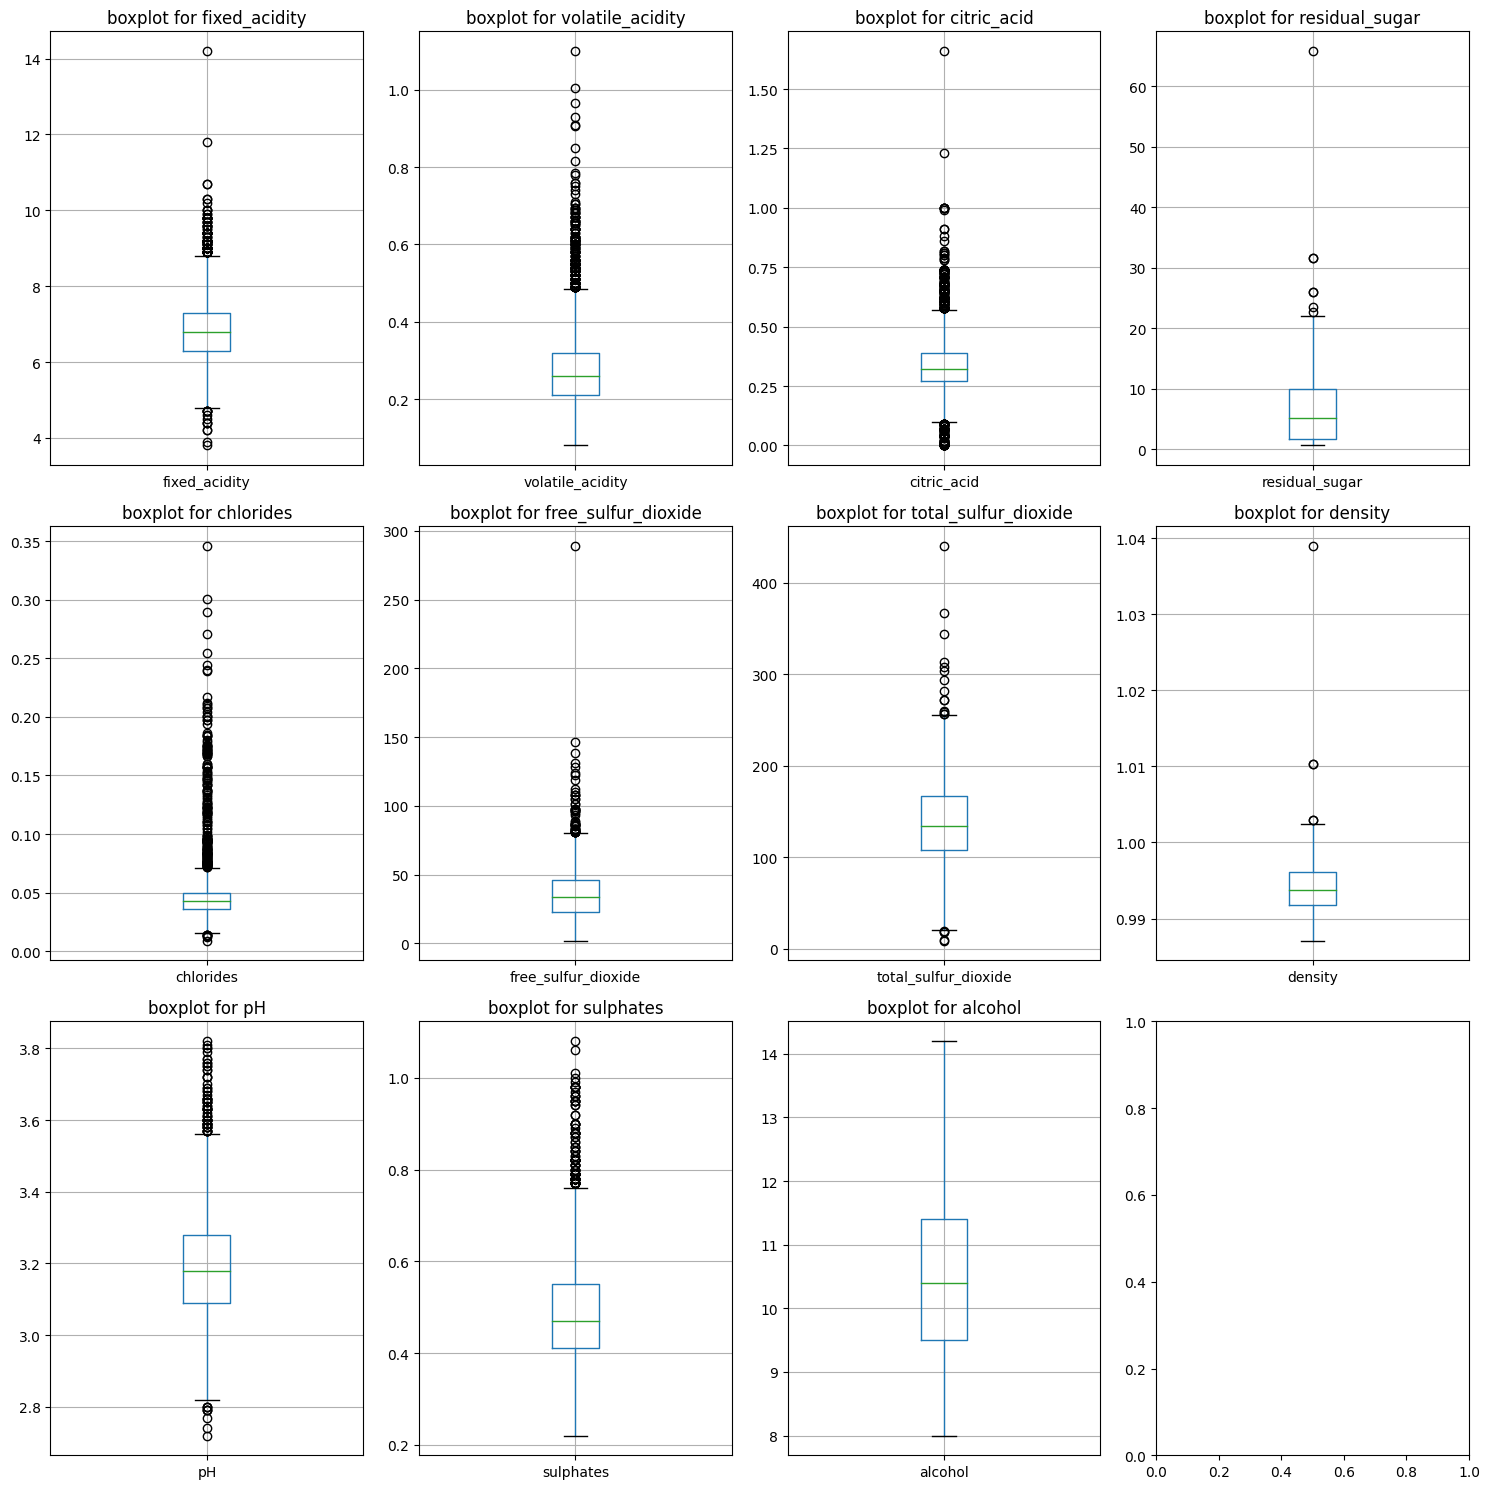

In [ ]:
#scatterplots


# Select only the numerical columns from the DataFrame
numerical_columns = df_wine_quality.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(3, 4, figsize=(15, 15)) 
axs = axs.flatten()


# Create a scatter plot for each feature column against the target
for i, column in enumerate(numerical_columns[:11]):
    data = df_wine_quality[column]
    df_wine_quality_features.boxplot(column = column, ax=axs[i])
    axs[i].set_title(f'boxplot for {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Delete the outliers

In [ ]:
def remove_outliers(df, column, lower_percentile, upper_percentile):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    # Create a mask where values are within the inter-percentile range
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    
    # Apply the mask to the DataFrame to keep rows without outliers
    return df[mask]

# Example usage: Remove outliers outside the 5th and 95th percentiles
#cleaned_df = remove_outliers(df_wine_quality_features, 'fixed_acidity', 0.00, 0.95)

heatmap

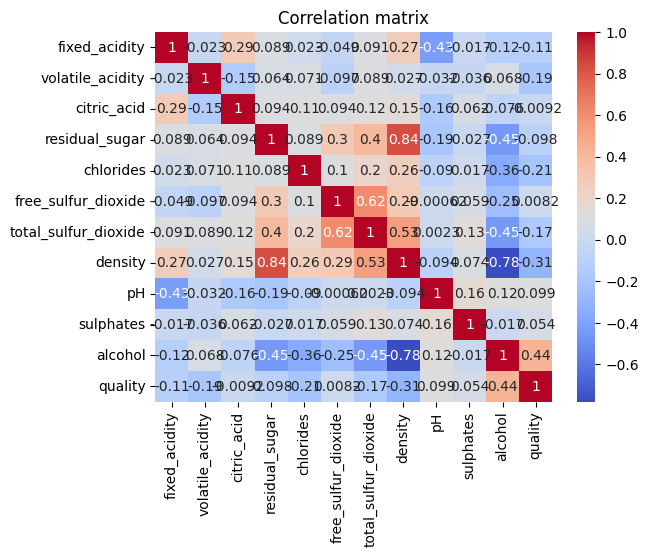

In [ ]:
import seaborn as sns
%matplotlib inline

correlation_matrix = df_wine_quality.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


## EDA:

## Visualize Data

## Significant Statement

## Conclusion & Discussions